In [1]:
## Import packages

import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

pd.set_option('display.max_columns', 500)

%matplotlib inline

# function for displaying eta_squared as measure of effect size in ANOVA

def eta_squared(aov):
    aov['eta_sq'] = 'NaN'
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    return aov

# Analyzing responsibility data from winter term 2019/2020

## Merge data from Bitzer and Hildebrand

In [5]:
data1 = pd.read_csv(r'2019-11-07_Hildebrand.csv', sep=";")
print(data1.shape)
data1.head()

(157, 87)


,lfdn,external_lfdn,tester,dispcode,lastpage,quality,duration,c_0001,Studienteilnahme,Trust_Car_1,Trust_Car_2,Trust_Car_3,car_check,Manip_Check_1,Manip_Check_2,Manip_Check_3,car_comp1,car_comp2,car_comp3,car_comp4,car_comp5,car_consc1,car_consc2,car_consc3,car_consc4,car_consc5,car_consc6,driv_comp1,driv_comp2,driv_comp3,driv_comp4,driv_comp5,driv_consc1,driv_consc2,driv_consc3,driv_consc4,Resp_Bic,Resp_Car,Resp_Driver,Resp_Producer,Sex,Age,Car_Owner,km_year,Education,Occupation,Occupation_Sonst,Income,Quality_1,Quality_2,Quality_3,Quality_4,Quality_5,Quality_6,ext_host,ip_addr,browser,referer,device_type,participant_browser,participant_browser_version,participant_os,participant_device,participant_brand,participant_model,participant_isbot,participant_continent,participant_country,participant_region,participant_city,participant_latitude,participant_longitude,quota,quota_assignment,page_history,hflip,vflip,output_mode,javascript,flash,session_id,language,cleaned,ats,datetime,date_of_last_access,date_of_first_mail
0,19,0,0,31,3878440,-77,1349,1,1,2,3,5,9,6,7,3,7,7,6,6,6,7,7,6,7,4,4,7,7,7,7,7,6,6,6,6,4,4,4,6,1,25,1,300,5,7,-99,1,7,1,7,7,1,7,-99,-99,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15) ...,-99,0,0,-99,0,0,0,0,0,0,0,-99,-99,-66,-66,0,-66,"3878430,3878432,3878435,3878436,3878437,387843...",1,1,0,-77,-77,02cbd320b7bc4ae302f2023c59d8568b,1,0,1571666104,2019-10-21 13:55:04,2019-10-21 14:17:33,0000-00-00 00:00:00
1,20,0,0,31,3878440,-77,313,5,1,3,2,4,9,5,2,2,5,4,4,6,6,6,5,3,5,6,5,4,5,4,6,4,5,6,4,4,2,5,3,6,2,24,2,3000,5,7,-99,1,6,2,7,5,1,7,-99,-99,Mozilla/5.0 (Linux; Android 7.1.1; SM-J510FN) ...,-99,0,0,-99,0,0,0,0,0,0,0,-99,-99,-66,-66,0,-66,"3878430,3878432,3878435,3878436,3878437,387843...",1,0,0,-77,-77,4fa76bfa326ad0959a35c42e24ea9868,1,0,1571666548,2019-10-21 14:02:28,2019-10-21 14:07:41,0000-00-00 00:00:00
2,34,0,0,31,3878440,-77,490,2,1,1,2,6,3,7,5,1,2,2,3,2,4,4,4,4,4,4,4,1,2,2,2,2,4,5,6,5,1,3,7,2,1,27,2,15000,5,7,-99,1,5,2,7,7,1,7,-99,-99,Mozilla/5.0 (iPhone; CPU iPhone OS 13_1_2 like...,-99,0,0,-99,0,0,0,0,0,0,0,-99,-99,-66,-66,0,-66,"3878430,3878432,3878435,3878436,3878436,387843...",0,0,0,-77,-77,6ffc04c53315dab2eec67dd81fed8813,1,0,1571668222,2019-10-21 14:30:22,2019-10-21 14:38:32,0000-00-00 00:00:00
3,39,0,0,31,3878440,-77,1038,4,1,4,4,4,10,4,5,3,5,4,3,4,3,1,1,1,1,1,1,4,4,4,3,4,4,5,4,4,5,4,5,4,2,25,1,18000,5,7,-99,1,4,1,7,7,1,7,-99,-99,Mozilla/5.0 (Linux; Android 8.0.0; RNE-L21) Ap...,-99,0,0,-99,0,0,0,0,0,0,0,-99,-99,-66,-66,0,-66,"3878430,3878432,3878435,3878436,3878437,387843...",1,1,0,-77,-77,1d592b69c88664ecb52b22cd35cbdd2b,1,0,1571669406,2019-10-21 14:50:06,2019-10-21 15:07:24,0000-00-00 00:00:00
4,43,0,0,31,3878440,-77,345,1,1,3,7,6,5,6,5,1,7,6,6,6,6,2,3,3,4,3,3,6,5,5,6,6,3,5,2,2,2,7,6,7,2,22,1,20000,5,1,-99,1,2,6,6,7,1,7,-99,-99,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14) ...,-99,0,0,-99,0,0,0,0,0,0,0,-99,-99,-66,-66,0,-66,"3878430,3878432,3878435,3878436,3878437,387843...",0,1,0,-77,-77,75c855a9f4d5b9c198ae5bedf34baff7,1,0,1571669892,2019-10-21 14:58:12,2019-10-21 15:03:57,0000-00-00 00:00:00


In [6]:
data2 = pd.read_csv(r'2019-11-07_Bitzer.csv', sep=";")
print(data2.shape)
data2.head()

(61, 87)


,lfdn,external_lfdn,tester,dispcode,lastpage,quality,duration,c_0001,Studienteilnahme,Trust_Car_1,Trust_Car_2,Trust_Car_3,car_check,Manip_Check_1,Manip_Check_2,Manip_Check_3,car_comp1,car_comp2,car_comp3,car_comp4,car_comp5,car_consc1,car_consc2,car_consc3,car_consc4,car_consc5,car_consc6,driv_comp1,driv_comp2,driv_comp3,driv_comp4,driv_comp5,driv_consc1,driv_consc2,driv_consc3,driv_consc4,Resp_Bic,Resp_Car,Resp_Driver,Resp_Producer,Sex,Age,Car_Owner,km_year,Education,Occupation,Occupation_Sonst,Income,Quality_1,Quality_2,Quality_3,Quality_4,Quality_5,Quality_6,ext_host,ip_addr,browser,referer,device_type,participant_browser,participant_browser_version,participant_os,participant_device,participant_brand,participant_model,participant_isbot,participant_continent,participant_country,participant_region,participant_city,participant_latitude,participant_longitude,quota,quota_assignment,page_history,hflip,vflip,output_mode,javascript,flash,session_id,language,cleaned,ats,datetime,date_of_last_access,date_of_first_mail
0,24,0,0,31,3884111,-77,740,6,1,4,5,5,6,1,3,1,5,5,6,4,4,4,7,4,6,4,4,2,3,1,1,1,6,7,6,7,4,4,4,7,1,24,2,2500,3,2,-99,2,7,1,7,5,1,5,-99,-99,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,-99,0,0,-99,0,0,0,0,0,0,0,-99,-99,-66,-66,0,-66,"3884104,3884105,3884106,3884107,3884108,388410...",0,0,0,-77,-77,fe9756107d066e90dc0d668b0af554cf,1,0,1571731288,2019-10-22 08:01:28,2019-10-22 08:13:48,0000-00-00 00:00:00
1,26,0,0,31,3884111,-77,626,2,1,1,1,6,9,5,5,5,4,4,4,5,5,4,4,5,3,4,4,2,3,3,3,2,6,6,4,7,3,7,2,6,1,24,2,500,3,2,-99,2,1,3,7,7,1,7,-99,-99,Mozilla/5.0 (Linux; Android 8.1.0; SM-T580) Ap...,-99,0,0,-99,0,0,0,0,0,0,0,-99,-99,-66,-66,0,-66,"3884104,3884105,3884106,3884107,3884108,388410...",1,1,0,-77,-77,57c055cbbf4eaee831f3723a9d5d6bf8,1,0,1571731316,2019-10-22 08:01:56,2019-10-22 08:12:22,0000-00-00 00:00:00
2,27,0,0,31,3884111,-77,418,5,1,1,2,3,10,7,2,1,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,2,6,6,6,1,30,1,15000,5,7,-99,4,7,1,7,7,1,5,-99,-99,Mozilla/5.0 (iPhone; CPU iPhone OS 13_1_3 like...,-99,0,0,-99,0,0,0,0,0,0,0,-99,-99,-66,-66,0,-66,"3884104,3884105,3884106,3884107,3884108,388410...",0,1,0,-77,-77,d26905c9aa7d9f07c3cb888cb85e42e5,1,0,1571732685,2019-10-22 08:24:45,2019-10-22 08:31:43,0000-00-00 00:00:00
3,28,0,0,31,3884111,-77,427,4,1,3,5,5,9,1,3,4,5,5,4,3,4,4,3,5,5,6,4,6,5,5,5,5,6,6,5,7,5,6,6,6,2,25,1,7000,5,7,-99,3,7,2,7,4,1,7,-99,-99,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,-99,0,0,-99,0,0,0,0,0,0,0,-99,-99,-66,-66,0,-66,"3884104,3884105,3884106,3884107,3884108,388410...",1,0,0,-77,-77,fbc2b61f0172bc712f8eae206f39d50e,1,0,1571735804,2019-10-22 09:16:44,2019-10-22 09:23:51,0000-00-00 00:00:00
4,29,0,0,32,3884111,-77,-1,1,1,4,3,4,8,2,3,2,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,6,5,4,2,5,4,5,1,30,1,10000,5,7,-99,4,4,6,5,4,1,6,-99,-99,Mozilla/5.0 (iPhone; CPU iPhone OS 12_4_1 like...,-99,0,0,-99,0,0,0,0,0,0,0,-99,-99,-66,-66,0,-66,"3884104,3884105,3884106,3884107,3884108,388410...",1,0,0,-77,-77,d5a4363cea69124f5fc104afa8455db6,1,0,1571739442,2019-10-22 10:17:22,2019-10-22 12:14:05,0000-00-00 00:00:00


In [7]:
data = pd.concat([data1, data2], ignore_index=True)
data.shape

(218, 87)

In [8]:
data.columns

Index(['lfdn', 'external_lfdn', 'tester', 'dispcode', 'lastpage', 'quality',
       'duration', 'c_0001', 'Studienteilnahme', 'Trust_Car_1', 'Trust_Car_2',
       'Trust_Car_3', 'car_check', 'Manip_Check_1', 'Manip_Check_2',
       'Manip_Check_3', 'car_comp1', 'car_comp2', 'car_comp3', 'car_comp4',
       'car_comp5', 'car_consc1', 'car_consc2', 'car_consc3', 'car_consc4',
       'car_consc5', 'car_consc6', 'driv_comp1', 'driv_comp2', 'driv_comp3',
       'driv_comp4', 'driv_comp5', 'driv_consc1', 'driv_consc2', 'driv_consc3',
       'driv_consc4', 'Resp_Bic', 'Resp_Car', 'Resp_Driver', 'Resp_Producer',
       'Sex', 'Age', 'Car_Owner', 'km_year', 'Education', 'Occupation',
       'Occupation_Sonst', 'Income', 'Quality_1', 'Quality_2', 'Quality_3',
       'Quality_4', 'Quality_5', 'Quality_6', 'ext_host', 'ip_addr', 'browser',
       'referer', 'device_type', 'participant_browser',
       'participant_browser_version', 'participant_os', 'participant_device',
       'participant_brand'

In [9]:
# Cases per experimental condition
data['c_0001'].value_counts().sort_index()

1    37
2    41
3    32
4    32
5    38
6    38
Name: c_0001, dtype: int64

In [10]:
# Drop unnecessary columns
data = data.drop(columns=['external_lfdn', 'tester', 'dispcode', 'lastpage', 'quality',
                         'Studienteilnahme', 'ext_host', 'ip_addr', 'browser',
       'referer', 'device_type', 'participant_browser',
       'participant_browser_version', 'participant_os', 'participant_device',
       'participant_brand', 'participant_model', 'participant_isbot',
       'participant_continent', 'participant_country', 'participant_region',
       'participant_city', 'participant_latitude', 'participant_longitude',
       'quota', 'quota_assignment', 'page_history', 'hflip', 'vflip',
       'output_mode', 'javascript', 'flash', 'session_id', 'language',
       'cleaned', 'ats', 'date_of_first_mail'])
data.columns

Index(['lfdn', 'duration', 'c_0001', 'Trust_Car_1', 'Trust_Car_2',
       'Trust_Car_3', 'car_check', 'Manip_Check_1', 'Manip_Check_2',
       'Manip_Check_3', 'car_comp1', 'car_comp2', 'car_comp3', 'car_comp4',
       'car_comp5', 'car_consc1', 'car_consc2', 'car_consc3', 'car_consc4',
       'car_consc5', 'car_consc6', 'driv_comp1', 'driv_comp2', 'driv_comp3',
       'driv_comp4', 'driv_comp5', 'driv_consc1', 'driv_consc2', 'driv_consc3',
       'driv_consc4', 'Resp_Bic', 'Resp_Car', 'Resp_Driver', 'Resp_Producer',
       'Sex', 'Age', 'Car_Owner', 'km_year', 'Education', 'Occupation',
       'Occupation_Sonst', 'Income', 'Quality_1', 'Quality_2', 'Quality_3',
       'Quality_4', 'Quality_5', 'Quality_6', 'datetime',
       'date_of_last_access'],
      dtype='object')

In [11]:
# Compute experimental factor variables

# Labels of c_0001
# 1 = 'Level 3, Baseline'
# 2 = 'Level 3, Baby'
# 3 = 'Level 3, Aggressive'
# 4 = 'Level 5, Baseline'
# 5 = 'Level 5, Baby'
# 6 = 'Level 5, Aggressive'

# Creat dictionaries
level_dictionary ={1 : 'Level 3', 2 : 'Level 3', 3 : 'Level 3', 
                   4 : 'Level 5', 5 : 'Level 5', 6 : 'Level 5'}
design_dictionary = {1 : 'Baseline', 2 : 'Baby', 3 : 'Aggressive', 
                     4 : 'Baseline', 5 : 'Baby', 6 : 'Aggressive'}
  
# Add a new columns
data['level'] = data['c_0001'].map(level_dictionary).astype('category') 
data['design'] = data['c_0001'].map(design_dictionary)

data['design'] = pd.Categorical(data['design'], ordered = False, categories = ['Baseline', 'Aggressive', 'Baby']) 

# Check
data[['c_0001', 'level', 'design']].head()

,c_0001,level,design
0,1,Level 3,Baseline
1,5,Level 5,Baby
2,2,Level 3,Baby
3,4,Level 5,Baseline
4,1,Level 3,Baseline


In [12]:
dict(enumerate(data['design'].cat.categories))

{0: 'Baseline', 1: 'Aggressive', 2: 'Baby'}

### Check manipulation variables

In [13]:
# Rename manipulationchecks Manip_Check_1 	Manip_Check_2 	Manip_Check_3 	
data = data.rename(columns={"Manip_Check_1": "childish", "Manip_Check_2": "ordinary", "Manip_Check_3":"aggressive"})

print(data[['car_check', 'childish', 'ordinary', 'aggressive']].describe()) #check min and max
print('\nMissing values\n',data[['car_check', 'childish', 'ordinary', 'aggressive']].isna().sum()) #check for missing values

        car_check    childish    ordinary  aggressive
count  218.000000  218.000000  218.000000  218.000000
mean     7.880734    3.247706    4.298165    2.431193
std      2.640433    2.151651    1.823577    1.756447
min      1.000000    1.000000    1.000000    1.000000
25%      6.000000    1.000000    3.000000    1.000000
50%      9.000000    2.000000    5.000000    2.000000
75%     10.000000    5.000000    6.000000    3.000000
max     11.000000    7.000000    7.000000    7.000000

Missing values
 car_check     0
childish      0
ordinary      0
aggressive    0
dtype: int64


In [14]:
# Manipulation check automation level

if stats.levene(data[data['level']=='Level 3']['car_check'], data[data['level']=='Level 5']['car_check'])[1] < .05: #check for variance equality
    t, p = stats.ttest_ind(data[data['level']=='Level 3']['car_check'], data[data['level']=='Level 5']['car_check'], equal_var=False) #t-test with Welch-correction
else:
    t, p = stats.ttest_ind(data[data['level']=='Level 3']['car_check'], data[data['level']=='Level 5']['car_check']) #t-test withouth Welch-correction

print('Comparing means of car_check between {} and {}: t-value = {}, p = {}'.format('Level 3', 'Level 5', round(t,4), round(p,4)))
print('Mean car_check for Level 3:', round(data[data['level']=='Level 3']['car_check'].mean(),3))
print('Mean car_check for Level 5:', round(data[data['level']=='Level 5']['car_check'].mean(),3))

Comparing means of car_check between Level 3 and Level 5: t-value = -4.7249, p = 0.0
Mean car_check for Level 3: 7.082
Mean car_check for Level 5: 8.694


In [15]:
# Average design evaluations for differnt design types

means_by_cond = pd.pivot_table(data, values=['childish', 'ordinary', 'aggressive'], index=['design'])

means_by_cond

,aggressive,childish,ordinary
design,,,
Baseline,2.405797,2.304348,5.275362
Aggressive,3.442857,2.042857,3.828571
Baby,1.556962,5.139241,3.860759


In [16]:
design_means = means_by_cond.T
design_means

design,Baseline,Aggressive,Baby
aggressive,2.405797,3.442857,1.556962
childish,2.304348,2.042857,5.139241
ordinary,5.275362,3.828571,3.860759


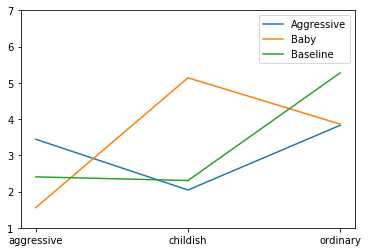

In [17]:
plt.plot(design_means['Aggressive'])
plt.plot(design_means['Baby'])
plt.plot(design_means['Baseline'])

plt.legend(['Aggressive', 'Baby', 'Baseline'])
plt.xticks([0,1,2], labels=['aggressive', 'childish', 'ordinary'])
plt.ylim(1,7)

plt.show()

In [18]:
# T-tests for manipulation check
design = {0:'Baby', 1:'Aggressive'}
for perception in ['ordinary', 'childish', 'aggressive']: 
    print('T-tests for {}'.format(perception)+'\n')
    for i in design:
        t, p = stats.ttest_ind(data[data['design']=='Baseline'][perception], data[data['design']==design[i]][perception], nan_policy='omit')
        print('Mean difference between Baseline and {}: t = {}, p = {}'.format(design[i], round(t,3), round(p,3)),'\n')

T-tests for ordinary

Mean difference between Baseline and Baby: t = 5.398, p = 0.0 

Mean difference between Baseline and Aggressive: t = 4.944, p = 0.0 

T-tests for childish

Mean difference between Baseline and Baby: t = -9.865, p = 0.0 

Mean difference between Baseline and Aggressive: t = 1.083, p = 0.281 

T-tests for aggressive

Mean difference between Baseline and Baby: t = 3.773, p = 0.0 

Mean difference between Baseline and Aggressive: t = -3.475, p = 0.001 



## Two-factorial ANOVAS for responsibility attribution 

In [19]:
#check relevant variables

print(data[['Resp_Bic', 'Resp_Car', 'Resp_Driver', 'Resp_Producer']].describe()) #check min and max
print('\nMissing values\n',data[['Resp_Bic', 'Resp_Car', 'Resp_Driver', 'Resp_Producer']].isna().sum()) #check for missing values

         Resp_Bic    Resp_Car  Resp_Driver  Resp_Producer
count  218.000000  218.000000   218.000000     218.000000
mean     2.431193    4.614679     4.688073       4.986239
std      1.650957    1.952941     2.119461       1.949783
min      1.000000    1.000000     1.000000       1.000000
25%      1.000000    4.000000     4.000000       4.000000
50%      2.000000    5.000000     5.000000       5.000000
75%      4.000000    6.000000     7.000000       7.000000
max      7.000000    7.000000     7.000000       7.000000

Missing values
 Resp_Bic         0
Resp_Car         0
Resp_Driver      0
Resp_Producer    0
dtype: int64


In [22]:
# Two-factorial ANOVAS

for resp in ['Resp_Bic', 'Resp_Car', 'Resp_Driver', 'Resp_Producer']:

    formula = '{} ~ C(level) + C(design) + C(level):C(design)'.format(resp)
    model = ols(formula, data).fit()
    aov_table = anova_lm(model, typ=2)
    eta_squared(aov_table)
    print('ANOVA on {}'.format(resp)+'\n',aov_table.round(4))
    print('\n')

ANOVA on Resp_Bic
                       sum_sq     df       F  PR(>F)  eta_sq
C(level)              0.0076    1.0  0.0028  0.9581  0.0000
C(design)             6.3869    2.0  1.1625  0.3147  0.0108
C(level):C(design)    2.6754    2.0  0.4870  0.6152  0.0045
Residual            582.3603  212.0     NaN     NaN     NaN


ANOVA on Resp_Car
                       sum_sq     df       F  PR(>F)  eta_sq
C(level)             15.5599    1.0  4.2780  0.0398  0.0188
C(design)            15.8365    2.0  2.1770  0.1159  0.0191
C(level):C(design)   24.6226    2.0  3.3849  0.0357  0.0298
Residual            771.0803  212.0     NaN     NaN     NaN


ANOVA on Resp_Driver
                       sum_sq     df        F  PR(>F)  eta_sq
C(level)             99.6930    1.0  24.3897  0.0000  0.1022
C(design)             4.6327    2.0   0.5667  0.5683  0.0047
C(level):C(design)    4.9808    2.0   0.6093  0.5447  0.0051
Residual            866.5500  212.0      NaN     NaN     NaN


ANOVA on Resp_Producer
      

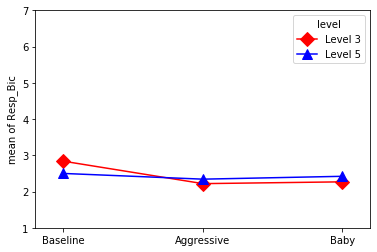

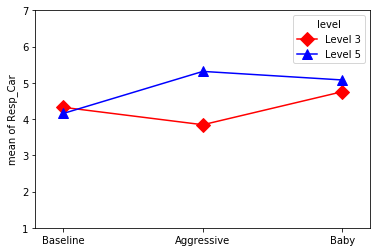

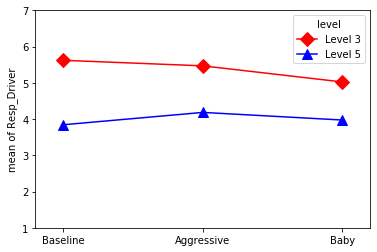

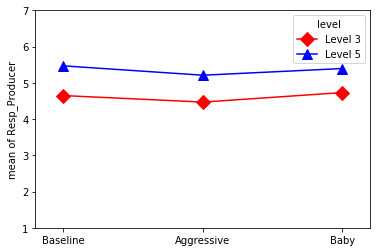

In [23]:
# Visualizing factorial data with statsmodel interaction_plot

for resp in ['Resp_Bic', 'Resp_Car', 'Resp_Driver', 'Resp_Producer']:

    fig = interaction_plot(x=data['design'].cat.codes, trace=data['level'], response=data[resp], 
                       colors=['red', 'blue'], markers=['D', '^'], ms=10)

    plt.xticks([0,1,2], labels=['Baseline', 'Aggressive', 'Baby'])
    plt.ylim(1,7)
    plt.show()

## Evaluate effect of design on mediators

In [24]:
print(data[['car_comp1', 'car_comp2', 'car_comp3', 'car_comp4',
       'car_comp5', 'car_consc1', 'car_consc2', 'car_consc3', 'car_consc4',
       'car_consc5', 'car_consc6', 'driv_comp1', 'driv_comp2', 'driv_comp3',
       'driv_comp4', 'driv_comp5', 'driv_consc1', 'driv_consc2', 'driv_consc3',
       'driv_consc4']].describe())

print(data[['car_comp1', 'car_comp2', 'car_comp3', 'car_comp4',
       'car_comp5', 'car_consc1', 'car_consc2', 'car_consc3', 'car_consc4',
       'car_consc5', 'car_consc6', 'driv_comp1', 'driv_comp2', 'driv_comp3',
       'driv_comp4', 'driv_comp5', 'driv_consc1', 'driv_consc2', 'driv_consc3',
       'driv_consc4']].isnull().sum())

        car_comp1   car_comp2   car_comp3   car_comp4   car_comp5  car_consc1  \
count  218.000000  218.000000  218.000000  218.000000  218.000000  218.000000   
mean     4.912844    4.472477    4.573394    4.637615    4.724771    4.155963   
std      1.611228    1.649375    1.555910    1.548556    1.582575    1.781494   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      4.000000    3.250000    4.000000    4.000000    4.000000    3.000000   
50%      5.000000    5.000000    5.000000    5.000000    5.000000    4.000000   
75%      6.000000    6.000000    6.000000    6.000000    6.000000    5.000000   
max      7.000000    7.000000    7.000000    7.000000    7.000000    7.000000   

       car_consc2  car_consc3  car_consc4  car_consc5  car_consc6  driv_comp1  \
count  218.000000  218.000000  218.000000  218.000000  218.000000  218.000000   
mean     4.389908    4.100917    4.238532    3.761468    3.733945    4.683486   
std      1.706396    1.6845

In [25]:
# one missing value (0) in driv_consc1

data['driv_consc1'].describe()

count    218.000000
mean       4.348624
std        1.823432
min        0.000000
25%        3.000000
50%        5.000000
75%        6.000000
max        7.000000
Name: driv_consc1, dtype: float64

In [26]:
#delete this one case

print(data.shape)
data = data[data['driv_consc1'] > 0]
print(data.shape)



(218, 52)
(217, 52)


In [27]:
# evaluate cronbach's alpha of construct measures

# Define function for calculating reliability (https://stackoverflow.com/questions/20799403/improving-performance-of-cronbach-alpha-code-python-numpy)

def CronbachAlpha(itemscores):
    # cols are items, rows are observations
    itemscores = np.asarray(itemscores)
    itemvars = itemscores.var(axis=0, ddof=1)
    tscores = itemscores.sum(axis=1)
    nitems = itemscores.shape[1]

    return (nitems / (nitems-1)) * (1 - (itemvars.sum() / tscores.var(ddof=1)))

In [28]:
print('Reliability of car competence:',CronbachAlpha(data[['car_comp1', 'car_comp2', 'car_comp3', 'car_comp4',
       'car_comp5']]))

print('Reliability of car conscientiousness:',CronbachAlpha(data[['car_consc1', 'car_consc2', 'car_consc3', 'car_consc4']]))

print('Reliability of driver competence:',CronbachAlpha(data[['driv_comp1', 'driv_comp2', 'driv_comp3',
       'driv_comp4', 'driv_comp5']]))

print('Reliability of driver conscientiousness:',CronbachAlpha(data[['driv_consc1', 'driv_consc2', 'driv_consc3',
       'driv_consc4']]))

Reliability of car competence: 0.9284746110461156
Reliability of car conscientiousness: 0.9159200378598699
Reliability of driver competence: 0.9540109892151144
Reliability of driver conscientiousness: 0.9353645471693144


In [40]:
# Sufficient reliability, calculate construct measures

data['car_comp'] = data[['car_comp1', 'car_comp2', 'car_comp3', 'car_comp4', 'car_comp5']].mean(axis=1)
data['car_consc'] = data[['car_consc1', 'car_consc2', 'car_consc3', 'car_consc4']].mean(axis=1)

data['driv_comp'] = data[['driv_comp1', 'driv_comp2', 'driv_comp3', 'driv_comp4', 'driv_comp5']].mean(axis=1)
data['driv_consc'] = data[['driv_consc1', 'driv_consc2', 'driv_consc3', 'driv_consc4']].mean(axis=1)

In [33]:
data[['car_comp', 'car_consc', 'driv_comp', 'driv_consc']].describe()

,car_comp,car_consc,driv_comp,driv_consc
count,217.000000,217.000000,217.000000,217.000000
mean,4.653456,4.208525,4.542857,4.395161
std,1.398180,1.541482,1.515615,1.601760
min,1.000000,1.000000,1.000000,1.000000
25%,3.800000,3.500000,3.400000,3.500000
50%,4.800000,4.250000,4.600000,4.500000
75%,5.800000,5.250000,5.600000,5.750000
max,7.000000,7.000000,7.000000,7.000000


In [34]:
# Two-factorial ANOVAS

for attribution in ['car_comp', 'car_consc', 'driv_comp', 'driv_consc']:

    formula = '{} ~ C(level) + C(design) + C(level):C(design)'.format(attribution)
    model = ols(formula, data).fit()
    aov_table = anova_lm(model, typ=2)
    eta_squared(aov_table)
    print('ANOVA on {}'.format(attribution)+'\n',aov_table.round(4))
    print('\n')

ANOVA on car_comp
                       sum_sq     df       F  PR(>F)  eta_sq
C(level)              3.8983    1.0  1.9726  0.1616  0.0092
C(design)             0.0145    2.0  0.0037  0.9963  0.0000
C(level):C(design)    1.3291    2.0  0.3363  0.7148  0.0031
Residual            416.9726  211.0     NaN     NaN     NaN


ANOVA on car_consc
                       sum_sq     df       F  PR(>F)  eta_sq
C(level)              1.7254    1.0  0.7372  0.3915  0.0034
C(design)            12.7708    2.0  2.7283  0.0676  0.0249
C(level):C(design)    5.3316    2.0  1.1390  0.3221  0.0104
Residual            493.8240  211.0     NaN     NaN     NaN


ANOVA on driv_comp
                       sum_sq     df       F  PR(>F)  eta_sq
C(level)              0.1190    1.0  0.0517  0.8204  0.0002
C(design)             3.5955    2.0  0.7807  0.4594  0.0072
C(level):C(design)    6.5470    2.0  1.4215  0.2437  0.0132
Residual            485.9016  211.0     NaN     NaN     NaN


ANOVA on driv_consc
               

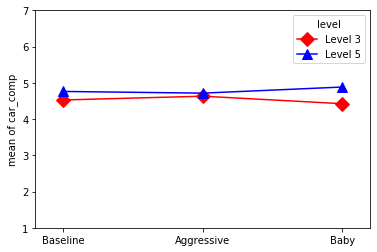

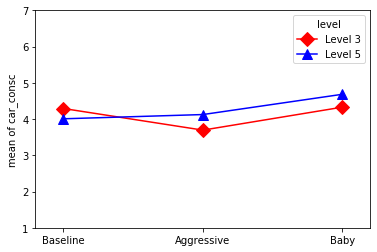

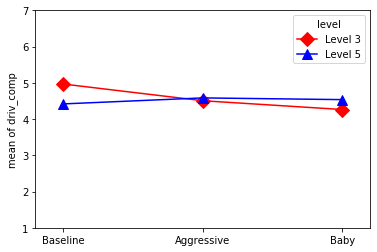

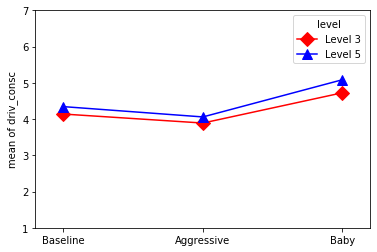

In [35]:
for attribution in ['car_comp', 'car_consc', 'driv_comp', 'driv_consc']:

    fig = interaction_plot(x=data['design'].cat.codes, trace=data['level'], response=data[attribution], 
                       colors=['red', 'blue'], markers=['D', '^'], ms=10)

    plt.xticks([0,1,2], labels=['Baseline', 'Aggressive', 'Baby'])
    plt.ylim(1,7)
    plt.show()

## Correlates between mediators and responsibility ascription


In [36]:
data[['Resp_Bic', 'Resp_Car', 'Resp_Driver', 'Resp_Producer', 'car_comp', 'car_consc', 'driv_comp', 'driv_consc']].corr()

,Resp_Bic,Resp_Car,Resp_Driver,Resp_Producer,car_comp,car_consc,driv_comp,driv_consc
Resp_Bic,1.000000,-0.182183,-0.144164,-0.299414,0.025351,0.013752,0.097523,0.030378
Resp_Car,-0.182183,1.000000,-0.155512,0.376187,0.059811,0.110093,0.079640,0.048170
Resp_Driver,-0.144164,-0.155512,1.000000,-0.118742,-0.200576,-0.079596,0.089409,-0.017757
Resp_Producer,-0.299414,0.376187,-0.118742,1.000000,0.111462,0.049337,-0.088615,0.030400
car_comp,0.025351,0.059811,-0.200576,0.111462,1.000000,0.470168,0.314648,0.227737
car_consc,0.013752,0.110093,-0.079596,0.049337,0.470168,1.000000,0.317525,0.521367
driv_comp,0.097523,0.079640,0.089409,-0.088615,0.314648,0.317525,1.000000,0.323053
driv_consc,0.030378,0.048170,-0.017757,0.030400,0.227737,0.521367,0.323053,1.000000


In [37]:
# Function to calculate p-values

from scipy.stats import pearsonr

def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

In [38]:
rho = data[['Resp_Bic', 'Resp_Car', 'Resp_Driver', 'Resp_Producer', 'car_comp', 'car_consc', 'driv_comp', 'driv_consc']].corr()
rho = rho.round(2)
pval = calculate_pvalues(data[['Resp_Bic', 'Resp_Car', 'Resp_Driver', 'Resp_Producer', 'car_comp', 'car_consc', 'driv_comp', 'driv_consc']]) 
# create three masks
r1 = rho.applymap(lambda x: '{}*'.format(x))
r2 = rho.applymap(lambda x: '{}**'.format(x))
r3 = rho.applymap(lambda x: '{}***'.format(x))
# apply them where appropriate
rho = rho.mask(pval<=0.1,r1)
rho = rho.mask(pval<=0.05,r2)
rho = rho.mask(pval<=0.01,r3)
rho

,Resp_Bic,Resp_Car,Resp_Driver,Resp_Producer,car_comp,car_consc,driv_comp,driv_consc
Resp_Bic,1.0***,-0.18***,-0.14**,-0.3***,0.03,0.01,0.1,0.03
Resp_Car,-0.18***,1.0***,-0.16**,0.38***,0.06,0.11,0.08,0.05
Resp_Driver,-0.14**,-0.16**,1.0***,-0.12*,-0.2***,-0.08,0.09,-0.02
Resp_Producer,-0.3***,0.38***,-0.12*,1.0***,0.11,0.05,-0.09,0.03
car_comp,0.03,0.06,-0.2***,0.11,1.0***,0.47***,0.31***,0.23***
car_consc,0.01,0.11,-0.08,0.05,0.47***,1.0***,0.32***,0.52***
driv_comp,0.1,0.08,0.09,-0.09,0.31***,0.32***,1.0***,0.32***
driv_consc,0.03,0.05,-0.02,0.03,0.23***,0.52***,0.32***,1.0***


In [ ]:
# Only singifcant relationship (negative) between car competence and responsibility of driver